In [83]:
# importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [84]:
# read the IRIS dataset into a DataFrame
df_iris = pd.read_csv('IRIS.csv')


In [85]:
# explore the dataframe
print(df_iris.head())
print(df_iris.info())
print(df_iris.describe())
iris_outcome = pd.crosstab(index=df_iris["species"], columns="count")
print(iris_outcome)
# print(df_iris['species'].unique())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

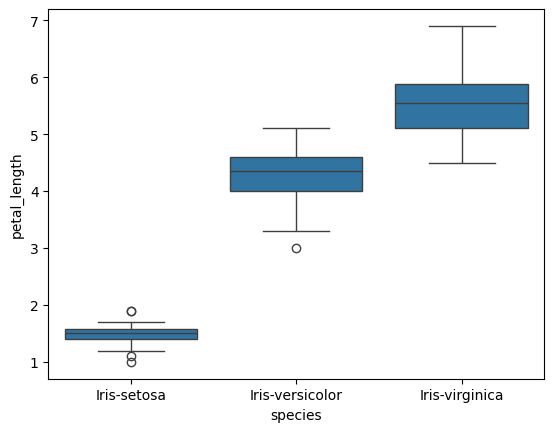

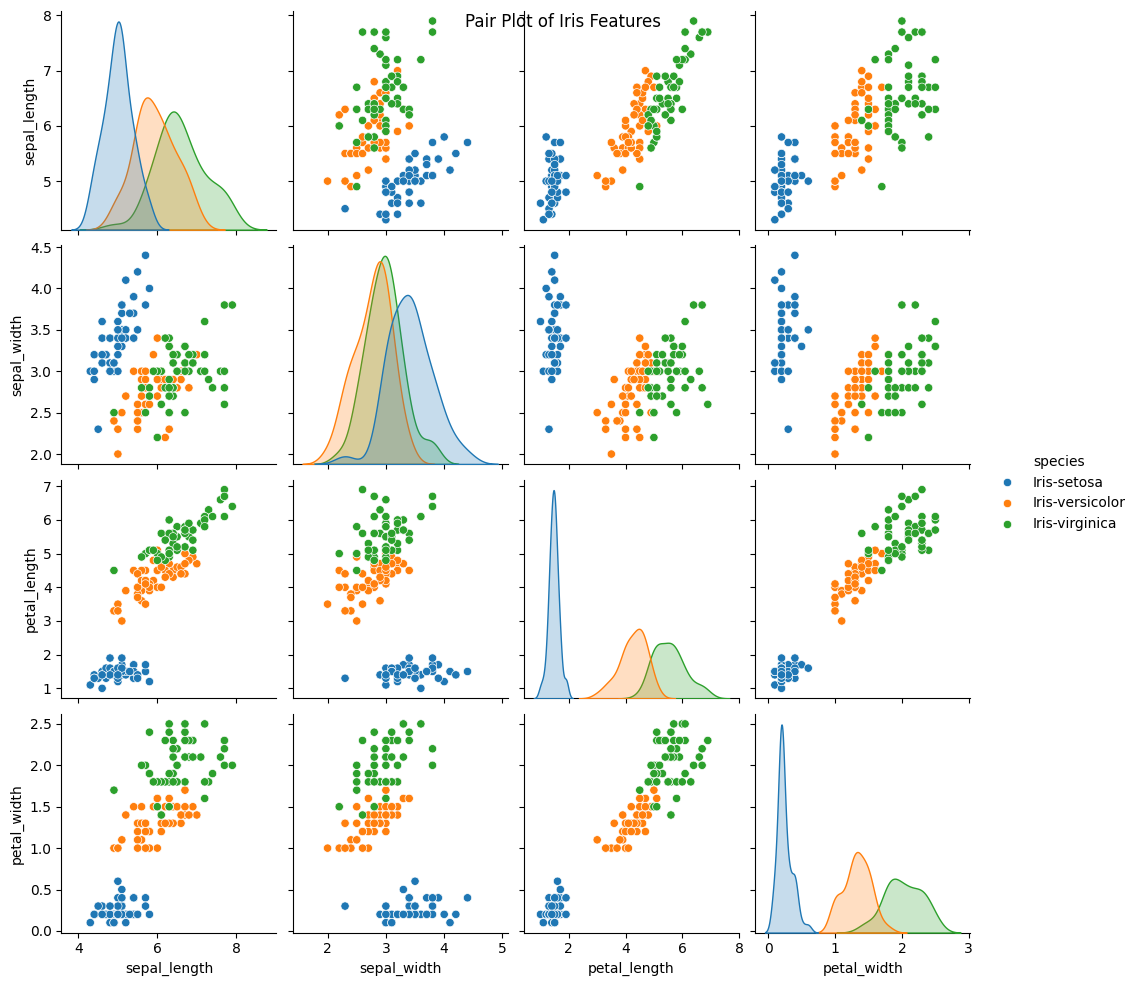

In [86]:
# visualize the data in df
sns.boxplot(x="species",y="petal_length",data= df_iris)
plt.show()

sns.pairplot(df_iris, hue='species')
plt.suptitle('Pair Plot of Iris Features')
plt.show()

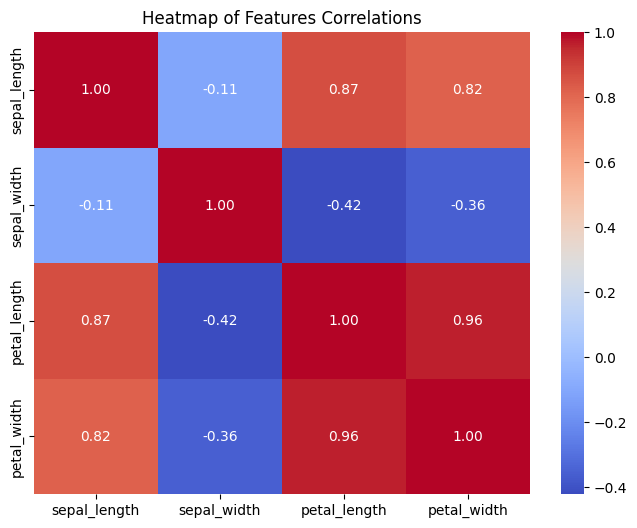

In [87]:
plt.figure(figsize=(8, 6))
corr = df_iris.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Features Correlations')
plt.show()

In [88]:
# Assuming df_iris is already defined
print(df_iris.columns)

df_iris_encoded = df_iris.copy()

# Remove 'Iris-' prefix
df_iris['species'] = df_iris_encoded['species'].str.replace('Iris-', '')

# Change the column type to category
df_iris_encoded['species'] = df_iris_encoded['species'].astype('category')

# Check the info of the species column
print(df_iris_encoded['species'].info())

# Preprocessing the category to be compatible with the model
df_iris_encoded = pd.get_dummies(df_iris_encoded, columns=['species'], dtype='int')

# Display the first few rows of the encoded DataFrame
print(df_iris_encoded.head())


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype   
--------------  -----   
150 non-null    category
dtypes: category(1)
memory usage: 414.0 bytes
None
   sepal_length  sepal_width  petal_length  petal_width  species_Iris-setosa  \
0           5.1          3.5           1.4          0.2                    1   
1           4.9          3.0           1.4          0.2                    1   
2           4.7          3.2           1.3          0.2                    1   
3           4.6          3.1           1.5          0.2                    1   
4           5.0          3.6           1.4          0.2                    1   

   species_Iris-versicolor  species_Iris-virginica  
0                        0                       0  
1                        0                       0  
2                        0       

In [89]:
# choosing the number of clusters 
within_centroids_sum_squared = []

# Loop over the number of clusters
for k in range(1,11):
    # Create a pipeline with the scaler and KMeans
    # intialize the models 
    kmeans = KMeans(n_clusters=k, random_state=42)
    scaler = StandardScaler()
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(df_iris_encoded)
    within_centroids_sum_squared.append(kmeans.inertia_)

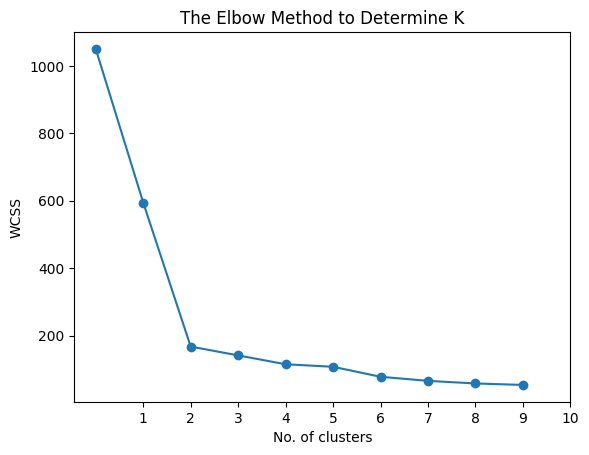

In [90]:
plt.plot(within_centroids_sum_squared, marker ='o', linestyle = '-')
plt.xticks(range(1,11))
plt.title('The Elbow Method to Determine K')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
# Choose the number of clusters based on the elbow curve (for example, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
scaler = StandardScaler()

# Create and fit the pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df_iris_encoded)

# Predict the cluster labels
df_iris_encoded['labels'] = pipeline.predict(df_iris_encoded)

print(df_iris_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sepal_length             150 non-null    float64
 1   sepal_width              150 non-null    float64
 2   petal_length             150 non-null    float64
 3   petal_width              150 non-null    float64
 4   species_Iris-setosa      150 non-null    int64  
 5   species_Iris-versicolor  150 non-null    int64  
 6   species_Iris-virginica   150 non-null    int64  
 7   labels                   150 non-null    int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 8.9 KB
None


Text(0.5, 1.0, 'KMeans Clustering of iris Data')

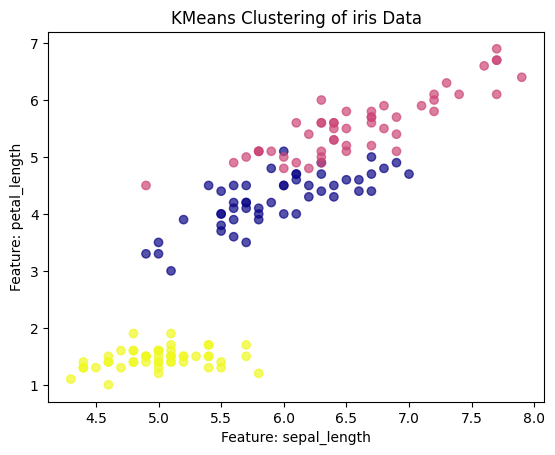

In [92]:
plt.scatter(df_iris_encoded.iloc[:, 0], df_iris_encoded.iloc[:, 2], c=df_iris_encoded['labels'], cmap='plasma', alpha=0.7)
plt.xlabel('Feature: sepal_length')
plt.ylabel('Feature: petal_length')
plt.title('KMeans Clustering of iris Data')

In [93]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

features = df_iris_encoded.drop(columns=['labels'])
print("Silhouette Score:", silhouette_score(features, df_iris_encoded['labels']))
print("Calinski-Harabasz Index:", calinski_harabasz_score(features, df_iris_encoded['labels']))
print("Davies-Bouldin Index:", davies_bouldin_score(features, df_iris_encoded['labels']))

Silhouette Score: 0.6216114869616787
Calinski-Harabasz Index: 568.5477453046757
Davies-Bouldin Index: 0.5863868541736257


In [94]:
from sklearn.metrics import mean_squared_error
df_iris['class'] = df_iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

X = df_iris.drop(columns=['species', 'class']).values
y = df_iris['class'].values

# print the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
print("ROC AUC: {:.2f}%".format(roc_auc_score(y_test, y_pred_proba, multi_class='ovr') * 100))
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("RMSE:".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred, average='macro') * 100))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

X shape: (150, 4)
y shape: (150,)
ROC AUC: 100.00%
RMSE:
Accuracy: 100.00%
Precision: 100.00%
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
